In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import data_loader
import network

training_data, _, test_data = data_loader.load_data_wrapper()

number of different labels for the output: 10


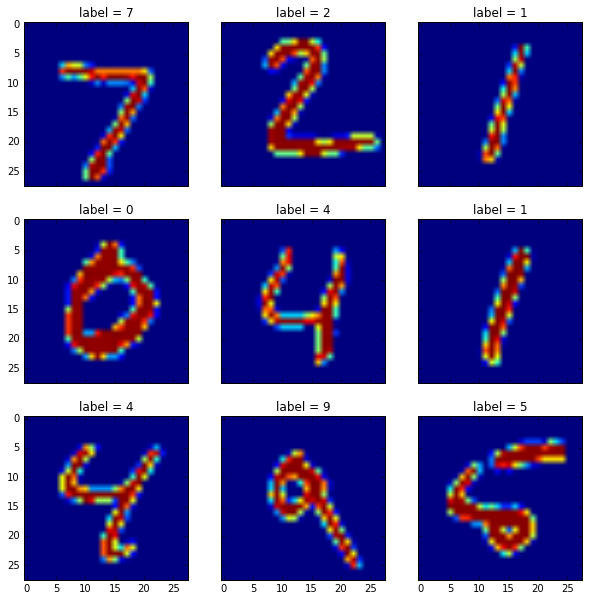

In [3]:
# a)
# plot a few of the images in the test data
L = 28
img_label_data = test_data[:9] # first 9 images of the test_data
fig, axes = plt.subplots(3, 3, True, True, figsize=(10, 10))
for ((img, label), ax) in zip(img_label_data, axes.flatten()):
    ax.imshow(np.reshape(img, [L, L]))
    ax.set_title("label = "+str(label))
plt.show()

In [4]:
net = network.Network([784, 30, 10])  # (The network without working backpropag method!)
img, desired_result = training_data[0]
print("img.shape =", img.shape)
y = net.feedforward(img)
print("y.shape =", y.shape)

img.shape = (784, 1)
y.shape = (10, 1)


In [5]:
print("biases shape: ", [b.shape for b in net.biases])
print("weights shape: ", [w.shape for w in net.weights])

biases shape:  [(30, 1), (10, 1)]
weights shape:  [(30, 784), (10, 30)]


In [6]:
# implement the backpropagation for the network, solution from the book.
# full explanation: http://neuralnetworksanddeeplearning.com/chap2.html

class Network(network.Network):

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = network.sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * network.sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = network.sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

In [7]:
net = Network([784, 30, 10])
net.SGD(training_data, 15, 10, 0.5, test_data=test_data)

Epoch  0:     8259 / 10000 = 82.6%
Epoch  1:     8774 / 10000 = 87.7%
Epoch  2:     8974 / 10000 = 89.7%
Epoch  3:     9074 / 10000 = 90.7%
Epoch  4:     9127 / 10000 = 91.3%
Epoch  5:     9163 / 10000 = 91.6%
Epoch  6:     9219 / 10000 = 92.2%
Epoch  7:     9229 / 10000 = 92.3%
Epoch  8:     9265 / 10000 = 92.7%
Epoch  9:     9267 / 10000 = 92.7%
Epoch  10:     9275 / 10000 = 92.8%
Epoch  11:     9283 / 10000 = 92.8%
Epoch  12:     9307 / 10000 = 93.1%
Epoch  13:     9309 / 10000 = 93.1%
Epoch  14:     9325 / 10000 = 93.2%


# note
There are quite some fluctuations in how good we can train the network; 
just rerunning it again with the same parameters can give better results in some cases.

There are various techniques to make the training more reliable, chapter 3 of the Nielsen's book talks about them.
Yet, we have already seen the basic idea behind the neural networks (and machine learning in general): instead of designing an algorithm for a very specific task (like classifying handwritten digits), we generate a structure which can "learn" the
algorithm from a lot of example data provided (so-called supervised learning). This approach is "universal" in the sense that it can be applied to a lot of different problems, and in many cases even yields better results than writing a "code" in the traditional sense, e.g. it is nearly impossible to write a code recognising handwritten digits from image data.


In [33]:
net = Network([784, 30, 10])
net.SGD(training_data, 15, 10, 0.5, test_data=test_data) # same parameters

Epoch  0:     8455 / 10000 = 84.5%
Epoch  1:     8825 / 10000 = 88.2%
Epoch  2:     8953 / 10000 = 89.5%
Epoch  3:     9060 / 10000 = 90.6%
Epoch  4:     9124 / 10000 = 91.2%
Epoch  5:     9162 / 10000 = 91.6%
Epoch  6:     9213 / 10000 = 92.1%
Epoch  7:     9225 / 10000 = 92.2%
Epoch  8:     9244 / 10000 = 92.4%
Epoch  9:     9251 / 10000 = 92.5%
Epoch  10:     9282 / 10000 = 92.8%
Epoch  11:     9293 / 10000 = 92.9%
Epoch  12:     9306 / 10000 = 93.1%
Epoch  13:     9321 / 10000 = 93.2%
Epoch  14:     9326 / 10000 = 93.3%


### try again with a deeper network and more neurons

In [34]:
net = Network([784, 50, 30, 10]) # (training takes a long time!)
net.SGD(training_data, 15, 10, 0.5, test_data=test_data)

Epoch  0:     8383 / 10000 = 83.8%
Epoch  1:     8899 / 10000 = 89.0%
Epoch  2:     9055 / 10000 = 90.5%
Epoch  3:     9153 / 10000 = 91.5%
Epoch  4:     9219 / 10000 = 92.2%
Epoch  5:     9250 / 10000 = 92.5%
Epoch  6:     9302 / 10000 = 93.0%
Epoch  7:     9320 / 10000 = 93.2%
Epoch  8:     9341 / 10000 = 93.4%
Epoch  9:     9370 / 10000 = 93.7%
Epoch  10:     9373 / 10000 = 93.7%
Epoch  11:     9387 / 10000 = 93.9%
Epoch  12:     9386 / 10000 = 93.9%
Epoch  13:     9419 / 10000 = 94.2%
Epoch  14:     9408 / 10000 = 94.1%


actually hard to improve...

# Training with Monte Carlo data
### generate and load Monte carlo data

In [10]:
generate = False
try:
    training_data_ising, _, test_data_ising = data_loader.load_data_wrapper("mcIsing.pkl.gz")
except IOError: 
    # file not existent: need to generate data first
    generate = True
    
if generate:
    print("need to generate")
    import generate_mc_data
    data = generate_mc_data.generate_data()
    generate_mc_data.save_data(data, filename="mcIsing.pkl.gz")
    # retry loading
    training_data_ising, _, test_data_ising = data_loader.load_data_wrapper("mcIsing.pkl.gz")

number of different labels for the output: 3


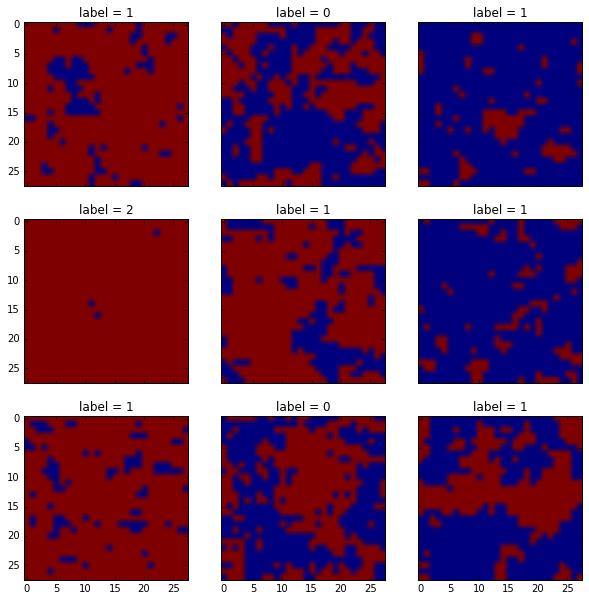

In [11]:
# plot a few of the images in the test data
L = 28
img_label_data = test_data_ising[:9]
fig, axes = plt.subplots(3, 3, True, True, figsize=(10, 10))
for ((img, label), ax) in zip(img_label_data, axes.flatten()):
    ax.imshow(np.reshape(img, [L, L]))
    ax.set_title("label = "+str(label))
plt.show()

### associate labels to temperatures
|label|temp. T|   
|-----|-------|-----------------------------------
|0    |3      |disordered
|1    |2.3    |close to critical, already ordered for the given system size
|2    |1.5    |ordered, few fluctuations

### train a network

In [12]:
net = Network([784, 30, 3])
net.SGD(training_data_ising, 15, 10, 0.5, test_data=test_data_ising)

Epoch  0:     3078 / 6000 = 51.3%
Epoch  1:     3412 / 6000 = 56.9%
Epoch  2:     3532 / 6000 = 58.9%
Epoch  3:     3476 / 6000 = 57.9%
Epoch  4:     3672 / 6000 = 61.2%
Epoch  5:     3749 / 6000 = 62.5%
Epoch  6:     3719 / 6000 = 62.0%
Epoch  7:     3838 / 6000 = 64.0%
Epoch  8:     3843 / 6000 = 64.0%
Epoch  9:     3899 / 6000 = 65.0%
Epoch  10:     3972 / 6000 = 66.2%
Epoch  11:     4025 / 6000 = 67.1%
Epoch  12:     4062 / 6000 = 67.7%
Epoch  13:     4092 / 6000 = 68.2%
Epoch  14:     4108 / 6000 = 68.5%


note that we come above 66%, i.e. we classify at least some images of each temperature correctly!

In [13]:
net = Network([784, 10, 10, 10, 3])
net.SGD(training_data_ising, 15, 30, 0.5, test_data=test_data_ising)

Epoch  0:     3896 / 6000 = 64.9%
Epoch  1:     4143 / 6000 = 69.0%
Epoch  2:     4289 / 6000 = 71.5%
Epoch  3:     4492 / 6000 = 74.9%
Epoch  4:     4629 / 6000 = 77.2%
Epoch  5:     4962 / 6000 = 82.7%
Epoch  6:     5176 / 6000 = 86.3%
Epoch  7:     5232 / 6000 = 87.2%
Epoch  8:     5276 / 6000 = 87.9%
Epoch  9:     5282 / 6000 = 88.0%
Epoch  10:     5329 / 6000 = 88.8%
Epoch  11:     5297 / 6000 = 88.3%
Epoch  12:     5334 / 6000 = 88.9%
Epoch  13:     5360 / 6000 = 89.3%
Epoch  14:     5365 / 6000 = 89.4%


a deeper network with the same number of neurons is significantly better!

In [14]:
net = Network([784, 50, 30, 20, 3]) # and maybe more neurons?
net.SGD(training_data_ising, 15, 30, 0.5, test_data=test_data_ising)

Epoch  0:     4836 / 6000 = 80.6%
Epoch  1:     5434 / 6000 = 90.6%
Epoch  2:     5556 / 6000 = 92.6%
Epoch  3:     5605 / 6000 = 93.4%
Epoch  4:     5612 / 6000 = 93.5%
Epoch  5:     5626 / 6000 = 93.8%
Epoch  6:     5638 / 6000 = 94.0%
Epoch  7:     5642 / 6000 = 94.0%
Epoch  8:     5652 / 6000 = 94.2%
Epoch  9:     5654 / 6000 = 94.2%
Epoch  10:     5649 / 6000 = 94.2%
Epoch  11:     5650 / 6000 = 94.2%
Epoch  12:     5656 / 6000 = 94.3%
Epoch  13:     5655 / 6000 = 94.2%
Epoch  14:     5658 / 6000 = 94.3%


## Bonus: can we distinguish more temperatures?


In [15]:
import generate_mc_data
temps = [3., 2.5, 2.0, 1.5]
data = generate_mc_data.generate_data(temps=temps, N_training=5000)
train_mc_moreT, _, test_mc_more_T = data_loader.load_data_wrapper(data)

generate data for T= 3.000
generate data for T= 2.500
generate data for T= 2.000
generate data for T= 1.500
number of different labels for the output: 4


In [40]:
net = Network([784, 50, 30, len(temps)]) # higher number of neurons & deep!
net.SGD(train_mc_moreT, 15, 10, 0.2, test_data=test_mc_more_T)

Epoch  0:     2582 / 4000 = 64.5%
Epoch  1:     2759 / 4000 = 69.0%
Epoch  2:     2794 / 4000 = 69.8%
Epoch  3:     2811 / 4000 = 70.3%
Epoch  4:     2844 / 4000 = 71.1%
Epoch  5:     2878 / 4000 = 72.0%
Epoch  6:     2917 / 4000 = 72.9%
Epoch  7:     2955 / 4000 = 73.9%
Epoch  8:     2978 / 4000 = 74.5%
Epoch  9:     2993 / 4000 = 74.8%
Epoch  10:     3006 / 4000 = 75.2%
Epoch  11:     2983 / 4000 = 74.6%
Epoch  12:     3012 / 4000 = 75.3%
Epoch  13:     3016 / 4000 = 75.4%
Epoch  14:     3027 / 4000 = 75.7%


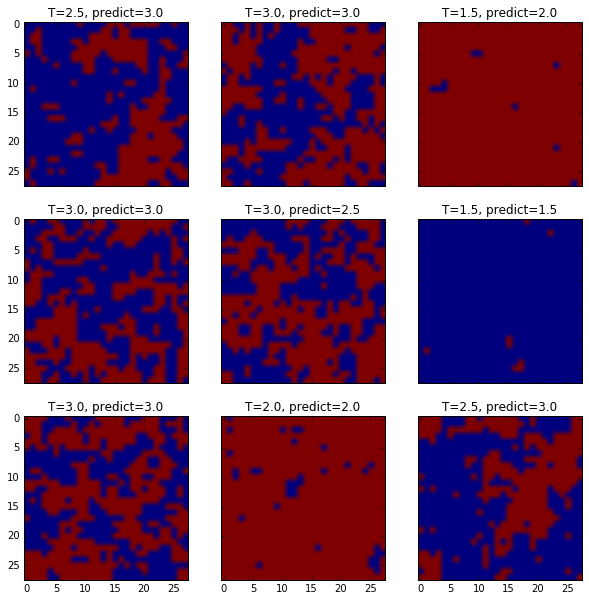

In [41]:
# plot a few of the images in the test data along with the output of the network
L = 28
img_label_data = test_mc_more_T[213:213+9] #some of the images
fig, axes = plt.subplots(3, 3, True, True, figsize=(10, 10))
for ((img, label), ax) in zip(img_label_data, axes.flatten()):
    ax.imshow(np.reshape(img, [L, L]))
    predict = np.argmax(net.feedforward(img)) # check what the network predicts
    ax.set_title("T={T:.1f}, predict={predict:.1f}".format(T=temps[label], predict=temps[predict]))
plt.show()

## interpretation
It's very hard to differentiate between T=2.5 and T=3.: both are essentially unordered (magnetization ~= 0), and can only be distinguished from the correlations. This is hard to do for a 28x28 image - it might work better for larger systems. 
We don't expect that the net can learn to distinguish all of them, since sometimes , the T=3. Monte Carlo simulation produces images which are also highly likely at T=2.5 and vice verca - their distributions have overlap.
The images of T=1.5 (right top) and T=2.0 also look quite similar, right?
Hence, acchieving a correct classification of more than 3/4=75% is already quite remarkable!